In [2]:
import anndata as ad
import numpy as np
import pandas as pd
import os.path as osp

from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

In [4]:
DIR ="/home/alma/w-projects/ccf/data/slideseq-hippo/Puck_200115_08/raw"
CNT_PTH = osp.join(DIR,"Puck_200115_08.digital_expression.txt")
MTA_PTH = osp.join(DIR,"Puck_200115_08_bead_locations.csv")


In [24]:
cnt =pd.read_csv(CNT_PTH,sep ="\t",index_col = 0, header = 0)


In [40]:
index = cnt.index
columns = cnt.columns

In [41]:
cnt = csr_matrix(cnt.values)

In [42]:
cnt = cnt.T

In [45]:
np.save("/tmp/cnt.npy",cnt)

In [ ]:
mta = pd.read_csv(MTA_PTH,header = 0,sep=",",index_col = 0)

In [63]:
adata = ad.AnnData(cnt,
                   var = pd.DataFrame(index.values,index = index,columns = ["Gene"]),
                   obs = mta,
                  )

In [65]:
adata.obsm["spatial"] = adata.obs[["xcoord","ycoord"]].values

In [66]:
adata.write_h5ad(osp.join(osp.dirname(DIR),osp.join("curated","Puck_200115_08.h5ad")))

In [ ]:
%restart

In [239]:
adata = ad.read_h5ad(osp.join(osp.dirname(DIR),osp.join("curated","Puck_200115_08.h5ad")))

In [6]:
adata

AnnData object with n_obs × n_vars = 53208 × 23264
    obs: 'xcoord', 'ycoord'
    var: 'Gene'
    obsm: 'spatial'

In [15]:
tot_cnt = np.array(np.sum(adata.X,axis=1)).flatten()

In [256]:
crd = adata.obsm["spatial"]
crd = crd - crd[:,0].min(axis=0)
crd = crd / crd.max() * 1999

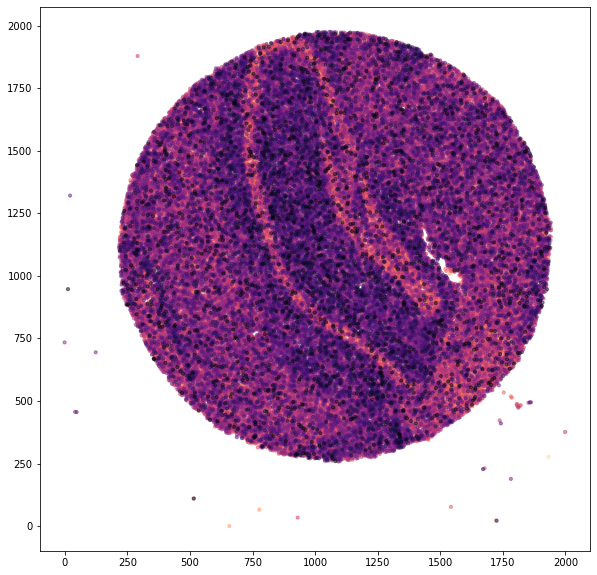

In [261]:
sf = 100
fig,ax = plt.subplots(1,1,figsize = (10,10),frameon = False)
landmarks = 


ax.set_aspect("equal")
plt.show()

In [267]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(crd[:,1],
           crd[:,0],
            s = 10,
            c = np.log10(tot_cnt),
            alpha = 0.5,
            cmap = plt.cm.magma)

ax.set_aspect("equal")
plt.plot()

[]

In [19]:
adata.obsm["spatial"][:,0]

array([ 888.95, 4762.2 ,  886.5 , ..., 3507.1 , 2155.  , 4819.7 ])

In [242]:
from PIL import Image
img = Image.open("/tmp/hippo.png")

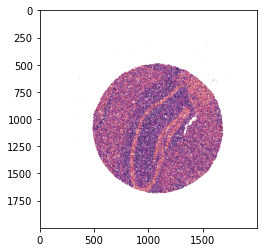

In [254]:
plt.imshow(img)

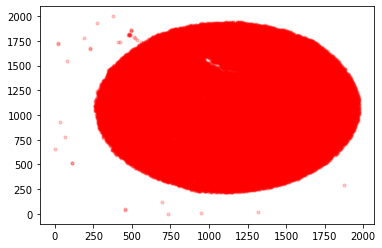

In [244]:
    plt.scatter(crd[:,0],
               crd[:,1],
                s = 10,
                c = "red",
                alpha = 0.2,
                cmap = plt.cm.Reds)

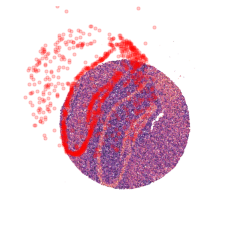

In [258]:
img = Image.open("/tmp/hippo.png")
scatter = True
#img = img.transpose(Image.FLIP_LEFT_RIGHT)
#img = img.transpose(Image.ROTATE_180)

#img = img.transpose(Image.FLIP_TOP_BOTTOM)
fig,ax = plt.subplots(1,1)
ax.imshow(img)

if scatter:
    ax.scatter(crd[0:1000,1]*0.7,
               crd[0:1000,0]*0.7,
                s = 10,
                c = "red",
                alpha = 0.2,
                cmap = plt.cm.Reds)
    ax.axis("off")
